# European streamflow database

## Analysis of the measurement length.

#### The main objective of this script is to start the posterior analysis of the concatenated data for Europe that now have their respective boundaries delineated either from official sources, or from the manual delineation employed. 
Here we can check the total number of measurements at each station (complete or not), plot the Gannt plots and vsualize how is the availablity of measuremnts over the years.

The boundaries were retrieved either from the official sources, or delineated manually. Here we should give them labels, and select and observe which one are possible to be used in the future, and which ones not. 

Written by: Thiago Victor Medeiros do Nascimento


Link to database spreadsheet: https://docs.google.com/spreadsheets/d/1xS1mWGolKbkn2xthTIW6QNHNkPVV6TnwWXLgYqxAozM/edit#gid=0

# Import modules

In [1]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pymannkendall as mk
from plotly.offline import plot
import contextily as cx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
import datetime
import tqdm as tqdm
import os
import glob
import calendar
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib as mpl

warnings.simplefilter(action='ignore', category=Warning)
%config Completer.use_jedi = False                           # This improve the auto-fill function

# Set working directory

In [2]:
path = r"C:\Users\nascimth\Documents\Thiago\Eawag\Python\Scripts\Data\Streamflow"
os.chdir(path)
os.getcwd()

import geospatialfunctions as geospatialfunctions            # Geospatialfunctions is a module with useful functions

#### Countries currently available: 



1. Austria (AT)
2. Belgium (BE)
3. Belarus (BY)
4. Bosnia and Herzegovina (BA)
5. Croatia (HR)
6. Cyprus (CY)
7. Czechia (CZ)
8. Denmark (DK)
9. Estonia (EE)
10. Finland (FI)
11. France (FR)
12. Germany (DE)
13. Greece (GR) 
14. Great Britain (GB)
15. Hungary (HU)
16. Iceland (IS)
17. Ireland (IE)
18. Italy (IT)
19. Latvia (LV)
20. Lithuania (LT)
21. Luxembourg (LU)
22. Netherlands (NL)
23. Northern Ireland (UK)
24. Norway (NO)
25. Poland (PL)
26. Portugal (PT)
27. Romania (RO)
28. Russia (RU)
29. Serbia (RS)
30. Slovakia (SK)
31. Slovenia (SI)
32. Spain (ES)
33. Sweden (SE)
34. Switzerland (CH)
_____________________________________
35. North Macedonia (MK)
36. Moldova (MD)
37. Ukraine (UA)
38. Turkey (TR)
39. Bulgaria (BG)

#### Here we define the path where our streamflow data is stored:

In [3]:
path = r"..\..\..\Data\Streamflow\EU\\"

## Data lecture

In [4]:
timeseries_EU = pd.read_csv(r"..\..\..\Data\Streamflow\EU\UpdateOctober\timeseries_EU_v05.csv", index_col=0)
timeseries_EU.index = pd.to_datetime(timeseries_EU.index)
timeseries_EU.index.name = "dates"
timeseries_EU

,AT00001,AT00002,AT00003,AT00004,AT00005,AT00006,AT00007,AT00008,AT00009,AT00010,...,GRHCM020,GRHCM021,GRHCM022,GRHCM023,GRHCM026,GRHCM024,GRHCM025,GROHI028,GROHI027,GROHI029
dates,,,,,,,,,,,,,,,,,,,,,
1900-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
network_EU = pd.read_excel(r"..\..\..\Data\Streamflow\EU\UpdateOctober\network_EU_v05.xlsx")
network_EU.set_index("new_code", inplace = True)
network_EU

,code,name,river,area,elev,lon,lat,country,degimpact,lake,num_reservoir,RE,remark
new_code,,,,,,,,,,,,,
AT00001,200014,Bangs,Rhein,4647.9,420,9.534835,47.273748,AT,s,NaN,NaN,NaN,NaN
AT00002,200048,Schruns (Vonbunweg),Litz,102.0,673,9.913677,47.080301,AT,l,NaN,NaN,NaN,NaN
AT00003,231662,Loruens-Aeule,Ill,535.2,579,9.847765,47.132821,AT,s,NaN,NaN,NaN,NaN
AT00004,200592,Kloesterle (OEBB),Alfenz,66.6,1014,10.061843,47.128994,AT,s,NaN,NaN,NaN,NaN
AT00005,200097,Buers (Bruecke L82),Alvier,72.2,564,9.802668,47.150770,AT,s,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRHCM025,Loutra Ypatis2,LoutraYpatis,Spercheios,NaN,NaN,22.284100,38.908000,GR,NaN,NaN,NaN,NaN,NaN
GRHCM026,Fonias,Samothraki,Thasou - Samothrakis,NaN,NaN,25.653100,40.488600,GR,NaN,NaN,NaN,NaN,NaN
GROHI027,KARVELIOTIS,Καρβελιώτης,NaN,NaN,598,22.223610,37.073480,GR,NaN,NaN,NaN,NaN,NaN


## Time-series lengh:
At this part we can check our time-series lengh. It provides the number of daily measurements, the number of complete months, the number of complete years and the number of years with any observation. For that we will use the functions from the geospatialfunctions module. 

In [6]:
network_EU[["num_daily_obs", "num_monthly", "num_monthly_complete", "num_yearly", "num_yearly_complete"]] = geospatialfunctions.count_num_measurements(timeseries = timeseries_EU)
network_EU

,code,name,river,area,elev,lon,lat,country,degimpact,lake,num_reservoir,RE,remark,num_daily_obs,num_monthly,num_monthly_complete,num_yearly,num_yearly_complete
new_code,,,,,,,,,,,,,,,,,,
AT00001,200014,Bangs,Rhein,4647.9,420,9.534835,47.273748,AT,s,NaN,NaN,NaN,NaN,8766,288,288,24,24
AT00002,200048,Schruns (Vonbunweg),Litz,102.0,673,9.913677,47.080301,AT,l,NaN,NaN,NaN,NaN,22372,735,735,62,61
AT00003,231662,Loruens-Aeule,Ill,535.2,579,9.847765,47.132821,AT,s,NaN,NaN,NaN,NaN,12782,420,420,35,34
AT00004,200592,Kloesterle (OEBB),Alfenz,66.6,1014,10.061843,47.128994,AT,s,NaN,NaN,NaN,NaN,8034,264,264,22,21
AT00005,200097,Buers (Bruecke L82),Alvier,72.2,564,9.802668,47.150770,AT,s,NaN,NaN,NaN,NaN,10957,360,360,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRHCM025,Loutra Ypatis2,LoutraYpatis,Spercheios,NaN,NaN,22.284100,38.908000,GR,NaN,NaN,NaN,NaN,NaN,1132,45,31,5,0
GRHCM026,Fonias,Samothraki,Thasou - Samothrakis,NaN,NaN,25.653100,40.488600,GR,NaN,NaN,NaN,NaN,NaN,1376,52,41,6,1
GROHI027,KARVELIOTIS,Καρβελιώτης,NaN,NaN,598,22.223610,37.073480,GR,NaN,NaN,NaN,NaN,NaN,883,30,28,4,2


Here we can compute the longest period with no gaps in our time-series:

In [8]:
longest_gap_periods = geospatialfunctions.longest_gap_measurements(timeseries = timeseries_EU)

100%|████████████████████████████████████████████████████████████████████████████| 11680/11680 [14:05<00:00, 13.81it/s]


In [9]:
# Here we can approximate to the number of years:
longest_gap_periods['longest_gap_period_years'] = (longest_gap_periods['longest_gap_period']/365).astype(int)
longest_gap_periods

,longest_gap_period,longest_gap_period_years
Code,,
AT00001,8766,24
AT00002,22372,61
AT00003,12782,35
AT00004,8034,22
AT00005,10957,30
...,...,...
HU00003,2061,5
HU00004,1746,4
HU00002,1911,5


In [10]:
# And now we can save our results:
network_EU[["longest_gap_period_days", "longest_gap_period_years"]] = longest_gap_periods
network_EU

,code,name,river,area,elev,lon,lat,country,degimpact,lake,...,remark,num_daily_obs,num_monthly,num_monthly_complete,num_yearly,num_yearly_complete,geometry,color_category,longest_gap_period_days,longest_gap_period_years
new_code,,,,,,,,,,,,,,,,,,,,,
AT00001,200014,Bangs,Rhein,4647.9,420,9.534835,47.273748,AT,s,NaN,...,NaN,8766,288,288,24,24,POINT (9.53484 47.27375),20-40,8766,24
AT00002,200048,Schruns (Vonbunweg),Litz,102.0,673,9.913677,47.080301,AT,l,NaN,...,NaN,22372,735,735,62,61,POINT (9.91368 47.08030),40-80,22372,61
AT00003,231662,Loruens-Aeule,Ill,535.2,579,9.847765,47.132821,AT,s,NaN,...,NaN,12782,420,420,35,34,POINT (9.84777 47.13282),20-40,12782,35
AT00004,200592,Kloesterle (OEBB),Alfenz,66.6,1014,10.061843,47.128994,AT,s,NaN,...,NaN,8034,264,264,22,21,POINT (10.06184 47.12899),20-40,8034,22
AT00005,200097,Buers (Bruecke L82),Alvier,72.2,564,9.802668,47.150770,AT,s,NaN,...,NaN,10957,360,360,30,30,POINT (9.80267 47.15077),20-40,10957,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HU00042,91069,Tápiógyörgye,Egyesült-Tápió,NaN,NaN,19.952605,47.332253,HU,NaN,NaN,...,NaN,6412,270,179,28,11,POINT (19.95260 47.33225),5-20,2700,7
HU00043,2049,Jásztelek,Zagyva,4207.0,86.61,19.993766,47.483795,HU,NaN,NaN,...,NaN,8190,354,228,37,14,POINT (19.99377 47.48380),5-20,1954,5
HU00044,1762,Tarnaörs,Tarna,1741.0,91.41,20.047867,47.597005,HU,NaN,NaN,...,NaN,7461,261,237,25,18,POINT (20.04787 47.59701),5-20,6033,16


## Number of stations per year:
Here we can check the number of stations per year:

In [ ]:
timeseries_EU_y = timeseries_EU.resample('Y').count() # First we count the number of days with non NaN values

timeseries_EU_y

In [11]:
summary_per_year = pd.DataFrame()
summary_per_year["less_than_0percent"] = (timeseries_EU_y.T >= 365).sum()
summary_per_year["less_than_1percent"] = (timeseries_EU_y.T > 360).sum()
summary_per_year["less_than_10percent"] = (timeseries_EU_y.T > 328).sum()
summary_per_year["less_than_25percent"] = (timeseries_EU_y.T > 273).sum()
summary_per_year["less_than_50percent"] = (timeseries_EU_y.T > 182).sum()
summary_per_year["less_than_100percent"] = (timeseries_EU_y.T > 0).sum()
summary_per_year

,less_than_0percent,less_than_1percent,less_than_10percent,less_than_25percent,less_than_50percent,less_than_100percent
dates,,,,,,
1900-12-31,14,14,14,14,15,16
1901-12-31,18,18,18,18,19,20
1902-12-31,19,19,19,19,19,21
1903-12-31,19,20,20,20,20,21
1904-12-31,21,21,21,21,21,22
...,...,...,...,...,...,...
2019-12-31,5437,5600,5825,5938,6900,7203
2020-12-31,4808,4905,5094,5216,5300,5449
2021-12-31,3652,3808,3991,4202,5009,5175


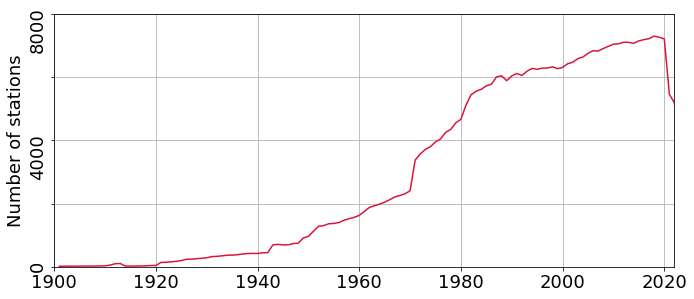

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a figure and axes
fig, axs = plt.subplots(1, 1, figsize=(10, 4.5))

# Add the line to the plot
axs.plot(summary_per_year.less_than_100percent, color="crimson")

start_date = pd.Timestamp('1900')
end_date = pd.Timestamp('2020')
axs.set_xlim(start_date, end_date)  # Use set_xlim to set the x-axis limits
axs.set_ylim(0, 8000)  # Use set_ylim to set the y-axis limits

axs.grid(True)

# Set labels and title with font size
axs.set_xlabel('')
axs.set_ylabel('Number of stations')

y_ticks = [0, "", 4000, "", 8000]  # Define the specific y-axis tick values you want to show
axs.set_yticklabels(y_ticks, rotation=90)

# Set font size for the entire figure
plt.rcParams.update({'font.size': 18})  # Change 18 to your desired font size

# Save the figure
fig.tight_layout()  # Adjust the positions of the axes to prevent overlapping elements
fig.savefig('fig2posterzhydro23.jpeg', dpi=300)

# Show the plot (if needed)
# plt.show()


## Gannt plots:
An now it is possible to plot the Gannt graphs of our measurements using the time-series resampled for annual time-step.
The time-seres were resampled to make it possible the Gannt plots processing since they may take a while to process. 

In [8]:
timeseries_EU_yearly = timeseries_EU.resample('Y').agg(lambda x: np.nan if np.isnan(x).any() else np.mean(x))
timeseries_EU_yearly

Code,AT00001,AT00002,AT00003,AT00004,AT00005,AT00006,AT00007,AT00008,AT00009,AT00010,...,GRHCM020,GRHCM021,GRHCM022,GRHCM023,GRHCM026,GRHCM024,GRHCM025,GROHI028,GROHI027,GROHI029
dates,,,,,,,,,,,,,,,,,,,,,
1900-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,185.494247,4.952027,6.750137,4.684055,3.33474,6.740164,29.919973,2.020614,73.909041,1.944904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.821214,NaN,NaN,NaN,0.384007,NaN,NaN,NaN,NaN,NaN
2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.368632,70.272866,NaN,1.477042,NaN,NaN,NaN,NaN,NaN,NaN


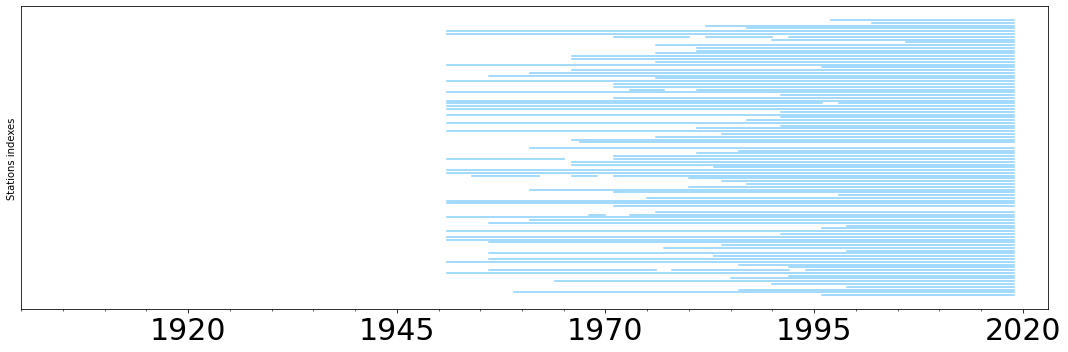

In [9]:
figplot1, axesplot1 = geospatialfunctions.plotganntchart(timeseriesfinal_gantt = timeseries_EU_yearly.iloc[:, 0:100], 
                                                         figsize_chart = (15, 5), 
                   showcodes = False,
                   color_chart = "lightskyblue", fontsize_chart = 30, facecolor_chart = "white", 
                   title_chart = "")
# Remove Y-axis ticks
axesplot1.set_yticks([])

axesplot1.set_xlabel('')
#axesplot1.set_ylabel('Stations indexes')

# Save the figure
figplot1.tight_layout()  # Adjust the positions of the axes to prevent overlapping elements
#figplot1.savefig('fig3posterzhydro23.jpeg', dpi=300)


## Plot map 1: Time-length of data

In [ ]:
# Function to find the first date with non-NaN value:
def find_first_non_nan_dates(data):

    first_non_nan_dates = data.apply(lambda col: col.first_valid_index())
    return first_non_nan_dates

first_non_nan_dates = find_first_non_nan_dates(timeseries_EU)

network_EU["first_non_nan_dates"] = first_non_nan_dates.dt.year

network_EU["first_non_nan_dates"] = network_EU["first_non_nan_dates"].astype(int)
network_EU

In [8]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

shapefile_path = r"C:\Users\nascimth\Documents\Thiago\Eawag\Python\GIS\countries/europe.shp"
gdf = gpd.read_file(shapefile_path)

def plot_num_measurementsmap_subplot(ax, plotsome: pd.DataFrame, xcoords="lon", ycoords="lat", column_labels="num_yearly_complete",
                                     crsproj='epsg:4326', showcodes=False, markersize_map=3, north_arrow=True, 
                                     set_map_limits=False, minx=0, miny=0, maxx=1, maxy=1, color_categories=None, color_mapping=None,
                                     legend_title=None, legend_labels=None, legend_loc='upper left', show_legend = True, 
                                     legend_outside=True, legend_bbox_to_anchor=(0.5, 1)):  # Add legend_outside and legend_bbox_to_anchor parameters:
    """
    Plot data on a subplot with additional options.

    Parameters:
        ax (matplotlib.axes.Axes): The subplot where the data will be plotted.
        plotsome (pd.DataFrame): The data to be plotted.
        xcoords (str): The name of the column containing x-coordinates.
        ycoords (str): The name of the column containing y-coordinates.
        column_labels (str): The name of the column containing data for coloring.
        crsproj (str): The coordinate reference system (CRS) for the data.
        showcodes (bool): Whether to show data labels.
        markersize_map (int): Size of the markers.
        north_arrow (bool): Whether to include a north arrow.
        set_map_limits (bool): Whether to set specific map limits.
        minx (float): Minimum x-axis limit.
        miny (float): Minimum y-axis limit.
        maxx (float): Maximum x-axis limit.
        maxy (float): Maximum y-axis limit.
        color_categories (list): List of color categories for data bins.
        color_mapping (dict): Mapping of color categories to colors.
        legend_title (str): Title for the legend.
        legend_labels (list): Labels for the legend items.
        legend_loc (str): Location of the legend.
        show_legend (bool): Whether to display the legend.
        legend_outside (bool): Whether to place the legend outside the plot.
        legend_bbox_to_anchor (tuple): Position of the legend (x, y).

    Returns:
        None
    """
    # Prepare the data for plotting
    crs = {'init': crsproj}
    geometry = plotsome.apply(lambda row: Point(row[xcoords], row[ycoords]), axis=1)
    geodata = gpd.GeoDataFrame(plotsome, crs=crs, geometry=geometry)
    geodatacond = geodata

    if color_categories is not None and color_mapping is not None:
        geodatacond['color_category'] = pd.cut(geodatacond[column_labels], bins=[c[0] for c in color_categories] + [np.inf], labels=[f'{c[0]}-{c[1]}' for c in color_categories])
    else:
        raise ValueError("Both color_categories and color_mapping must be provided.")

    # Plotting and legend:
    for category, group in geodatacond.groupby('color_category'):
        group.plot(ax=ax, color=color_mapping[category], markersize=markersize_map, legend=False, label=category)

    if showcodes == True:
        geodatacond["Code"] = geodatacond.index
        geodatacond.plot(column='Code', ax=ax)
        for x, y, label in zip(geodatacond.geometry.x, geodatacond.geometry.y, geodatacond.index):
            ax.annotate(label, xy=(x, y), xytext=(1, 1), textcoords="offset points")
        plt.rcParams.update({'font.size': 12})

    if set_map_limits == False:
        total_bounds = geodatacond.total_bounds
        minx, miny, maxx, maxy = total_bounds
        ax.set_xlim(minx, maxx)
        ax.set_ylim(miny, maxy)

    # Plot the legend
    if legend_labels is None:
        legend_labels = [f'{c[0]}-{c[1]}' for c in color_categories]
        
    if show_legend:
        if legend_outside:
            legend = ax.legend(title=legend_title, labels=legend_labels, loc='upper left', bbox_to_anchor=legend_bbox_to_anchor,
                               bbox_transform=ax.transAxes, frameon=False)  # Use bbox_transform to position the legend
        else:
            legend = ax.legend(title=legend_title, labels=legend_labels, loc=legend_loc, frameon=False)
            
        if legend_outside:
            ax.add_artist(legend)
            
    # Plot the north arrow:
    if north_arrow == True:
        x, y, arrow_length = 0.975, 0.125, 0.1

        ax.annotate('N', xy=(x, y), xytext=(x, y - arrow_length),
                    arrowprops=dict(facecolor='black', width=5, headwidth=15),
                    ha='center', va='center', fontsize=18,
                    xycoords='axes fraction')
  
    # Set font family and size using rcParams
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['font.size'] = 18  # You can adjust this value as needed


# Function to add circular legend
def add_circular_legend(ax, color_mapping, legend_labels, bbox_to_anchor=(0.01, 0.75)):
    """
    Add a circular legend to a subplot.

    Parameters:
        ax (matplotlib.axes.Axes): The subplot to which the legend will be added.
        color_mapping (dict): A mapping of legend labels to marker colors.
        legend_labels (list): List of legend labels.
        bbox_to_anchor (tuple): The legend's bounding box coordinates.

    Returns:
        None
    """
    handles = [Line2D([0], [0], marker='o', color='none', markerfacecolor=color_mapping[key],
                       markeredgecolor='none', markersize=5) for key in color_mapping]
    legend = ax.legend(handles, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title=legend_title)
    legend.get_frame().set_linewidth(0)  # Remove legend frame
    legend.get_frame().set_facecolor('none')  # Remove legend background
    legend.set_bbox_to_anchor(bbox_to_anchor)  # Adjust legend position


# Function to create histograms inside subplots
def add_hist(axes, data: pd.DataFrame, axes_loc=[0.05, 0.05, 0.15, 0.175], alpha_hist=0.7,
             num_bins=10, x_ticks=[0, 5], base_xaxis=1, xlim_i=0, xlim_f=5):
    """
    Add a histogram to a subplot.

    Parameters:
        data (pandas.Series): Data for the histogram.
        axes (matplotlib.axes.Axes): The subplot where the histogram will be added.
        axes_loc (list): Location and size of the inset axis.
        alpha_hist (float): Alpha value for histogram transparency.
        num_bins (int): Number of histogram bins.
        x_ticks (list): Specific x-axis tick values.
        base_xaxis (int): Minor locator base for x-axis ticks.
        xlim_i (float): Minimum x-axis limit.
        xlim_f (float): Maximum x-axis limit.

    Returns:
        None
    """
    # Create a histogram inset axis within the subplot
    hist_ax = axes.inset_axes(axes_loc)  # Adjust the values as needed
    # Extract the data for the histogram (replace 'column_name' with the actual column you want to plot)
    hist_data = data.dropna()

    # Plot the histogram within the inset axis
    hist_ax.hist(hist_data, bins=num_bins, color='gray', alpha=alpha_hist)
    hist_ax.set_xlabel('')  # Replace with an appropriate label
    hist_ax.set_ylabel('')  # Replace with an appropriate label

    # Hide the axis spines and ticks for the inset axis
    hist_ax.spines['top'].set_visible(False)
    hist_ax.spines['right'].set_visible(False)
    hist_ax.spines['left'].set_visible(False)
    hist_ax.spines['bottom'].set_visible(True)
    hist_ax.set_facecolor('none')
    hist_ax.set_yticklabels(hist_ax.get_yticks(), rotation=90, fontsize=5)

    # Adjust y-tick label alignment for the right y-axis
    hist_ax.yaxis.tick_right()  # Move the y-tick labels to the right side
    hist_ax.yaxis.set_label_position("right")  # Move the y-axis label to the right side

    # Define the specific y-axis tick values you want to show
    hist_ax.set_xticks(x_ticks)

    # Remove y-axis ticks and labels
    hist_ax.set_yticks([])
    hist_ax.set_yticklabels([])

    hist_ax.xaxis.set_minor_locator(plt.MultipleLocator(base=base_xaxis))  # Adjust the base as needed
    # Set x-axis limits (adjust the values as needed)
    hist_ax.set_xlim(xlim_i, xlim_f)

# Function to add a shapefile plot to a subplot
def add_shapefile(axes, shapefile=gdf,  linewidth_shp=0.1,
                  xlim_min=-24, xlim_max=45, ylim_min=35, ylim_max=70):
    """
    Add a shapefile plot to a subplot with specified properties.

    Parameters:
        shapefile (GeoDataFrame): The shapefile data to be plotted.
        axes (matplotlib.axes.Axes): The subplot where the shapefile will be added.
        linewidth_shp (float): Width of shapefile boundaries.
        xlim_min (float): Minimum value for the x-axis limit.
        xlim_max (float): Maximum value for the x-axis limit.
        ylim_min (float): Minimum value for the y-axis limit.
        ylim_max (float): Maximum value for the y-axis limit.

    Returns:
        None
    """
    # Set the background color to white
    axes.set_facecolor('white')
    # Plot the shapefile with white facecolor and black boundaries
    shapefile.plot(ax=axes, facecolor='white', edgecolor='black', linewidth=linewidth_shp)
    axes.set_xlim(xlim_min, xlim_max)
    axes.set_ylim(ylim_min, ylim_max)

In [9]:
color_categories = [(0, 5), (5, 10), (10, 20), (20, 40), (40, 80), (80, np.inf)]

legend_title = ""

legend_labels = ["<5","5-10", "10-20", "20-40", "40-80", ">80"]


color_mapping = {
    '0-5': '#A52A2A',   # Brown
    '5-10': '#ff7f0e',  # Orange
    '10-20': '#ffbb78',   # Light Orange
    '20-40': '#aec7e8',  # Light Blue
    '40-80': '#1f77b4',  # Blue
    '80-inf': '#9467bd'    # Purple (colorblind-friendly)
}


color_categories_2 = [(0, 2), (2, 10), (10, 20), (20, 30), (30, 40), (40, np.inf)]


legend_title_2 = ""

legend_labels_2 = ["<2","10", "20", "30",  "40", ">40"]

color_mapping_2 = {
    '0-2': '#A52A2A',   # Brown
    '2-10': '#ff7f0e',  # Light Orange
    '10-20': '#ffbb78',   # Orange
    '20-30': '#aec7e8',  # Light Blue
    '30-40': '#1f77b4',  # Blue
    '40-inf': '#9467bd'    # Purple (colorblind-friendly)
}


color_categories_3 = [(1900, 1970), (1970, 1980), (1980, 1990), (1990, 2000), (2000, 2010), (2010, np.inf)]

legend_title_3 = ""

legend_labels_3 = ["<1970","1980", "1990",  "2000", "2010", ">2010"]

color_mapping_3 = {
    '1900-1970': '#9467bd',    # Purple (colorblind-friendly) 
    '1970-1980': '#1f77b4',  # Blue, 
    '1980-1990': '#aec7e8',  # Light Blue
    '1990-2000': '#ffbb78',   # Light Orange
    '2000-2010': '#ff7f0e',  # Orange
    '2010-inf': '#A52A2A',   # Brown
}

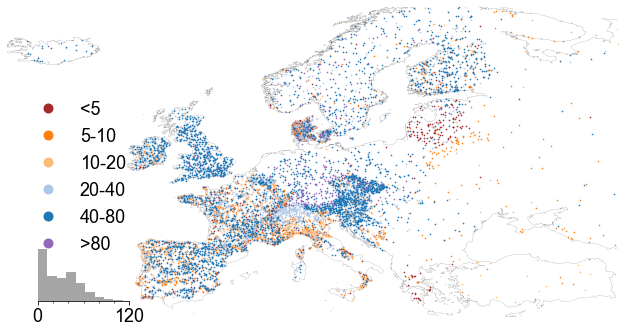

In [13]:
from matplotlib.lines import Line2D
import matplotlib as mpl

shapefile_path = r"C:\Users\nascimth\Documents\Thiago\Eawag\Python\GIS\countries/europe.shp"
gdf = gpd.read_file(shapefile_path)


# Set font properties using rcParams
mpl.rcParams['font.family'] = 'arial'  # Change the font family
#mpl.rcParams['font.size'] = 50          # Change the font size
mpl.rcParams['font.weight'] = 'normal'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'bold'  # Change label font weight (e.g., 'bold', 'normal')


# Create a function to add circular legend
def add_circular_legend(ax, color_mapping, legend_labels):
    handles = [Line2D([0], [0], marker='o', color='none', markerfacecolor=color_mapping[key], markeredgecolor='none', markersize=10) for key in color_mapping]
    legend = ax.legend(handles, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title=legend_title)
    legend.get_frame().set_linewidth(0)  # Remove legend frame
    legend.get_frame().set_facecolor('none')  # Remove legend background
    legend.set_bbox_to_anchor((0.01, 0.75))  # Adjust legend position

# ... your existing subplot and plot functions ...
# Create a 2x2 subplot grid
#fig, axs = plt.subplots(2, 2, figsize=(8, 6))
fig, axs = plt.subplots(1, 1, figsize=(10, 5))

###1:
# Set the background color to white
axs.set_facecolor('white')
# Plot the shapefile with white facecolor and black boundaries
gdf.plot(ax=axs, facecolor='white', edgecolor='black', linewidth=0.1)
axs.set_xlim(-24, 45) 
axs.set_ylim(35, 70)  


# Use the modified function to plot the same data in each subplot
plot_num_measurementsmap_subplot(plotsome = network_EU, xcoords="lon", ycoords="lat", column_labels = "num_yearly",
                                             color_categories=color_categories, color_mapping=color_mapping, 
                                             legend_title=legend_title, legend_labels=legend_labels, legend_loc='lower left', ax = axs, 
                                             set_map_limits=True, minx=-22, miny=35, maxx=45, maxy=70, show_legend = False, legend_outside = False, 
                                             north_arrow=False, markersize_map=0.4)

axs.set_axis_off()  # Turn off both x-axis and y-axis
#axs.set_title("(a) Time lenght [years]", loc = "left",  fontweight='bold', fontsize=8, pad=-1) 


# Create a histogram inset axis within the subplot
hist_ax = axs.inset_axes([0.05, 0.05, 0.15, 0.175])  # Adjust the values as needed
# Extract the data for the histogram (replace 'column_name' with the actual column you want to plot)
hist_data = network_EU['num_yearly'].dropna()

# Plot the histogram within the inset axis
hist_ax.hist(hist_data, bins=10, color='gray', alpha=0.7)
hist_ax.set_xlabel('')  # Replace with an appropriate label
hist_ax.set_ylabel('')  # Replace with an appropriate label

# Hide the axis spines and ticks for the inset axis
hist_ax.spines['top'].set_visible(False)
hist_ax.spines['right'].set_visible(False)
hist_ax.spines['left'].set_visible(False)
hist_ax.spines['bottom'].set_visible(True)
hist_ax.set_facecolor('none')
hist_ax.set_yticklabels(hist_ax.get_yticks(), rotation=90, fontsize=18)

# Adjust y-tick label alignment for the right y-axis
hist_ax.yaxis.tick_right()  # Move the y-tick labels to the right side
hist_ax.yaxis.set_label_position("right")  # Move the y-axis label to the right side

#hist_ax.yaxis.set_tick_params(pad=0.5)  # Adjust the padding as needed
#hist_ax.xaxis.set_tick_params(pad=0.5)  # Adjust the padding as needed

x_ticks = [0, 120]  # Define the specific y-axis tick values you want to show
hist_ax.set_xticks(x_ticks)

# Remove y-axis ticks and labels
hist_ax.set_yticks([])
hist_ax.set_yticklabels([])
hist_ax.xaxis.set_minor_locator(plt.MultipleLocator(base=20))  # Adjust the base as needed
# Set x-axis limits (adjust the values as needed)
hist_ax.set_xlim(0, 120)

# After each subplot creation, call the function to add a circular legend
add_circular_legend(axs, color_mapping, legend_labels)

axs.set_aspect('equal')  # Adjust aspect ratio as needed
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['bottom'].set_visible(False)
axs.spines['left'].set_visible(False)

# Adjust layout and remove space between subplots
plt.tight_layout()
#plt.subplots_adjust(hspace=0.5)  # Remove space between subplots


# Save or display the plot
#plt.show()
plt.savefig('figure1zhydro23.png', dpi=500)  # Replace 'figure.png' with your desired filename and format

## Plot map 2: Points

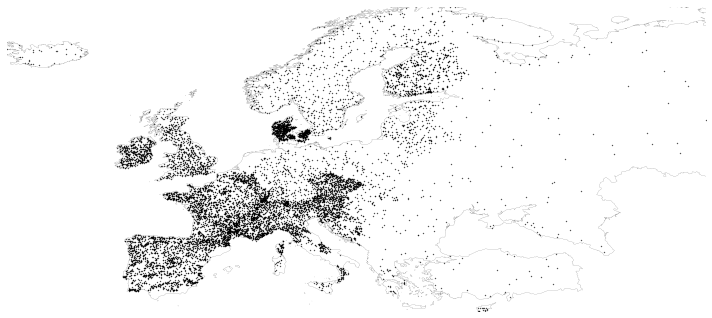

In [11]:
shapefile_path = r"C:\Users\nascimth\Documents\Thiago\Eawag\Python\GIS\countries/europe.shp"
gdf = gpd.read_file(shapefile_path)


# Set font properties using rcParams
mpl.rcParams['font.family'] = 'arial'  # Change the font family
mpl.rcParams['font.weight'] = 'normal'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'bold'  # Change label font weight (e.g., 'bold', 'normal')

fig, axs = plt.subplots(1, 1, figsize=(10, 5))

###1:
# Set the background color to white
axs.set_facecolor('white')
# Plot the shapefile with white facecolor and black boundaries
gdf.plot(ax=axs, facecolor='white', edgecolor='black', linewidth=0.1)
axs.set_xlim(-24, 45) 
axs.set_ylim(35, 70)  

geospatialfunctions.plotpointsmapnew(ax = axs, plotsome = network_EU, xcoords="lon", ycoords="lat", showcodes = False,  
                                  markersize_map = 0.1, 
                                  north_arrow = False, 
                                  set_map_limits = False,
                                  minx = -22, miny = 35, maxx = 45, maxy = 70)

axs.set_axis_off()  # Turn off both x-axis and y-axis

axs.set_aspect('equal')  # Adjust aspect ratio as needed
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['bottom'].set_visible(False)
axs.spines['left'].set_visible(False)

# Adjust layout and remove space between subplots
plt.tight_layout()


# Save or display the plot
#plt.show()
#plt.savefig('figureMarvinzhydro23.png', dpi=500)